# Objective: The objective of this assignment is to assess students' understanding of batch normalization in artificial neural networks (ANN) and its impact on training performance.

## Q1. Theory and concepts

### 1. Explain the concept of batch normalization in the context of Artificial Neural Network.

**Batch Normalization** is a technique used in artificial neural networks to improve training speed, stability, and performance. It addresses issues related to the internal covariate shift, which occurs when the distribution of inputs to a layer changes during training, leading to slower and less stable learning.

##### Key Concepts of Batch Normalization:

1. **Internal Covariate Shift:**

    - As neural networks learn, the distribution of each layer’s inputs can change as the model updates its weights. This phenomenon, called **internal covariate shift**, can slow down the training process because the network must constantly adapt to these shifting distributions.
    
    - Batch normalization helps mitigate this problem by normalizing the inputs of each layer so that they maintain a consistent distribution throughout training.
    
    
2. **Normalization Process:**

    - **Mean and Variance Calculation:** For each mini-batch, batch normalization calculates the mean and variance of the inputs.
    
    - **Normalization:** The inputs are then normalized by subtracting the mean and dividing by the standard deviation. This step ensures that the inputs to the activation functions have a zero mean and unit variance.
    
    - **Scaling and Shifting:** After normalization, the data is scaled and shifted using learned parameters, $\gamma$ (scale) and $\beta$ (shift), to allow the model to recover the original input distribution if necessary.
    


### 2. Describe the benefits of using batch normalization during training.

##### Benefits of Batch Normalization:

1. **Faster Convergence:**

    - By normalizing the inputs, batch normalization allows the network to converge faster during training. The normalized inputs stabilize the learning process, reducing the likelihood of getting stuck in local minima or plateaus.
    

2. **Improved Gradient Flow:**

    - Batch normalization helps maintain a more consistent gradient flow throughout the network, which is particularly beneficial in deep networks. This consistency prevents the vanishing or exploding gradient problem, making it easier to train very deep models.
    
    
3. **Reduced Dependence on Initialization:**

    - Neural networks typically require careful weight initialization to ensure that the learning process starts correctly. Batch normalization reduces the sensitivity of the network to the initial weights, allowing for more flexible and faster training.
    
    
4. **Regularization Effect:**

    - Although not explicitly designed as a regularization technique, batch normalization can have a regularizing effect, reducing the need for dropout or other regularization methods. This is because the noise introduced by the mini-batch statistics during training acts as a form of regularization.
    
    
5. **Higher Learning Rates:**

    - Batch normalization allows for the use of higher learning rates without the risk of the model diverging. This is because the normalization step controls the distribution of the inputs to the activation function, preventing extreme updates.

### 3.  Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

The working principle of batch normalization involves the following steps:

1. **Normalization Step:**

   - The first step in batch normalization is to normalize the inputs to a layer by adjusting the inputs so that they have a mean of zero and a variance of one. This process is done for each mini-batch during training.
   
   - Calculate the mean and variance of the input and then normalize the input layer. This step ensures that the output of the layer has a mean of 0 and a variance of 1 for each mini-batch.
   

2. **Scaling and Shifting:**

    - After normalization, the outputs are adjusted using two learnable parameters: scale ($\gamma$) and shift ($\beta$). These parameters allow the model to maintain the capacity to represent the original distributions of the inputs if necessary.
    
    - The normalized value $\hat{x}^{(i)}$ is multiplied by a scaling parameter $\gamma$. This parameter controls the variance of the normalized output.
    
    - The result is then shifted by an additive parameter $\beta$, which adjusts the mean of the normalized output.
    
    - The transformation is given by:
    
    $$ y^{(i)} = \gamma \hat{x}^{(i)} + \beta $$
    
    Here, $y^{(i)}$ is the final output after batch normalization for the $i$-th example in the mini-batch.
    
    
3. **Learnable Parameters:**

    - **$\gamma$ (scale):** This parameter allows the model to adjust the normalized output's standard deviation. If $\gamma$ = 1, the output retains the normalized variance. If $\gamma$ is different, it adjusts the variance accordingly.
    
    - **$\beta$ (shift):** This parameter shifts the mean of the normalized output. If $\beta$=0, the output retains the normalized mean of 0. Otherwise, it shifts the output mean according to the value of $\beta$.
    
    

4. **Training vs. Inference Mode:**

    - **During Training:** Batch normalization uses the mean and variance computed from the current mini-batch.

    - **During Inference:** The mean and variance used for normalization are not computed from the current mini-batch but instead are running averages (moving averages) accumulated during training. This ensures that the normalization is consistent and does not depend on the specific mini-batch being processed during inference.

## Q2. Implementation

### 1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

##### Loading the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"The train dataset shape is: {X_train.shape}, {y_train.shape}")
print(f"The test dataset shape is: {X_test.shape}, {y_test.shape}")

The train dataset shape is: (60000, 28, 28), (60000,)
The test dataset shape is: (10000, 28, 28), (10000,)


In [4]:
print(f"Shape of each image is: {X_train[0].shape}")

Shape of each image is: (28, 28)


##### Preprocessing the dataset

- The pixel values in the MNIST dataset range from 0 to 255. To normalize these values to a range of 0 to 1, divide by 255.0.
- MNIST images are 28x28 pixels and are represented as 2D arrays.
- The labels are integers from 0 to 9. One-hot encoding converts them into a binary matrix representation.

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorflow, PyTorch)

##### Define the Model Architecture

In this example, we'll create a simple neural network with:

- An input layer that matches the shape of the MNIST data (flattened 28x28 images).
- Two hidden layers with ReLU activation functions.
- An output layer with 10 neurons (for the 10 classes) and a softmax activation function.

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 classes)
])

##### Compiling the model

In [7]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 3. Train the neural network on the chosen dataset without using batch normalization.

##### Train the Model

In [8]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 - 3s - loss: 0.2431 - accuracy: 0.9291 - val_loss: 0.1297 - val_accuracy: 0.9607 - 3s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 2s - loss: 0.1096 - accuracy: 0.9668 - val_loss: 0.1288 - val_accuracy: 0.9608 - 2s/epoch - 1ms/step
Epoch 3/10
1875/1875 - 2s - loss: 0.0819 - accuracy: 0.9761 - val_loss: 0.1136 - val_accuracy: 0.9662 - 2s/epoch - 1ms/step
Epoch 4/10
1875/1875 - 2s - loss: 0.0671 - accuracy: 0.9807 - val_loss: 0.0892 - val_accuracy: 0.9770 - 2s/epoch - 1ms/step
Epoch 5/10
1875/1875 - 2s - loss: 0.0562 - accuracy: 0.9843 - val_loss: 0.0983 - val_accuracy: 0.9764 - 2s/epoch - 1ms/step
Epoch 6/10
1875/1875 - 2s - loss: 0.0487 - accuracy: 0.9863 - val_loss: 0.1085 - val_accuracy: 0.9759 - 2s/epoch - 1ms/step
Epoch 7/10
1875/1875 - 2s - loss: 0.0421 - accuracy: 0.9882 - val_loss: 0.1008 - val_accuracy: 0.9788 - 2s/epoch - 1ms/step
Epoch 8/10
1875/1875 - 2s - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.1079 - val_accuracy: 0.9781 - 2s/epoch - 1ms/step
Epoch 9/

### 4. Implement batch normalization layers in the neural network and train the model again.

In [12]:
from tensorflow.keras import layers, models

model_with_bn = models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    layers.Dense(10, activation='softmax'),   # Output layer with 10 neurons (for 10 classes)
])

##### Compiling the model with Batch Normalization

In [13]:
model_with_bn.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

##### Training the model

In [14]:
history_bn = model_with_bn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 - 4s - loss: 0.2748 - accuracy: 0.9215 - val_loss: 0.1213 - val_accuracy: 0.9657 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.1379 - accuracy: 0.9592 - val_loss: 0.0960 - val_accuracy: 0.9719 - 3s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 3s - loss: 0.1057 - accuracy: 0.9684 - val_loss: 0.0869 - val_accuracy: 0.9745 - 3s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 3s - loss: 0.0889 - accuracy: 0.9740 - val_loss: 0.0921 - val_accuracy: 0.9757 - 3s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 3s - loss: 0.0792 - accuracy: 0.9768 - val_loss: 0.0822 - val_accuracy: 0.9778 - 3s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 3s - loss: 0.0705 - accuracy: 0.9791 - val_loss: 0.0796 - val_accuracy: 0.9794 - 3s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 3s - loss: 0.0623 - accuracy: 0.9814 - val_loss: 0.0802 - val_accuracy: 0.9790 - 3s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 3s - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0905 - val_accuracy: 0.9784 - 3s/epoch - 2ms/step
Epoch 9/

### 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

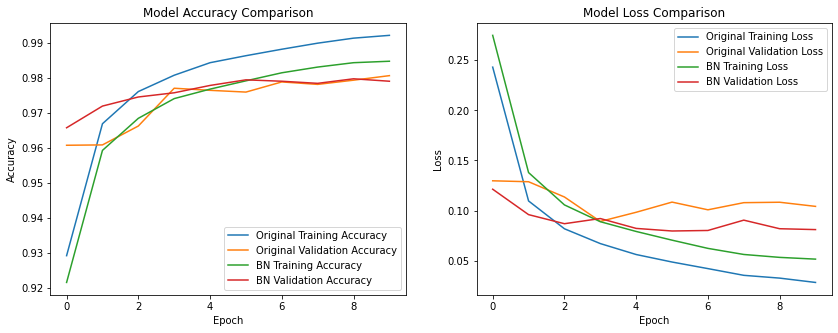

In [15]:
import matplotlib.pyplot as plt

# Plotting function
def plot_performance(history_original, history_bn):
    # Accuracy
    plt.figure(figsize=(14, 5))
    
    # Training Accuracy Comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_original.history['accuracy'], label='Original Training Accuracy')
    plt.plot(history_original.history['val_accuracy'], label='Original Validation Accuracy')
    plt.plot(history_bn.history['accuracy'], label='BN Training Accuracy')
    plt.plot(history_bn.history['val_accuracy'], label='BN Validation Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Loss Comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_original.history['loss'], label='Original Training Loss')
    plt.plot(history_original.history['val_loss'], label='Original Validation Loss')
    plt.plot(history_bn.history['loss'], label='BN Training Loss')
    plt.plot(history_bn.history['val_loss'], label='BN Validation Loss')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.show()

plot_performance(history, history_bn)

### 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

The above figures help us to visualize the training and validation loss of the Neural Networks with and without Batch Normalization. In terms of Model accuracy, model without batch normalization can seem to be performing better compared to model with Batch Normalization. But when observe the Model Loss, we can see that the model without Batch Normalization have higher validation loss compared to the model with Batch Normalization.

## Q3. Experimentation and Analysis

### 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

##### Training the same model with batch size 16

In [16]:
history_bs_16 = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10,
    verbose=2,
    validation_data=(X_test,y_test)
)

Epoch 1/10
3750/3750 - 5s - loss: 0.0349 - accuracy: 0.9913 - val_loss: 0.1473 - val_accuracy: 0.9762 - 5s/epoch - 1ms/step
Epoch 2/10
3750/3750 - 5s - loss: 0.0328 - accuracy: 0.9914 - val_loss: 0.1567 - val_accuracy: 0.9774 - 5s/epoch - 1ms/step
Epoch 3/10
3750/3750 - 5s - loss: 0.0333 - accuracy: 0.9924 - val_loss: 0.1444 - val_accuracy: 0.9786 - 5s/epoch - 1ms/step
Epoch 4/10
3750/3750 - 5s - loss: 0.0310 - accuracy: 0.9926 - val_loss: 0.1827 - val_accuracy: 0.9768 - 5s/epoch - 1ms/step
Epoch 5/10
3750/3750 - 5s - loss: 0.0287 - accuracy: 0.9934 - val_loss: 0.2034 - val_accuracy: 0.9731 - 5s/epoch - 1ms/step
Epoch 6/10
3750/3750 - 5s - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.1919 - val_accuracy: 0.9785 - 5s/epoch - 1ms/step
Epoch 7/10
3750/3750 - 5s - loss: 0.0256 - accuracy: 0.9942 - val_loss: 0.1967 - val_accuracy: 0.9743 - 5s/epoch - 1ms/step
Epoch 8/10
3750/3750 - 5s - loss: 0.0247 - accuracy: 0.9948 - val_loss: 0.2221 - val_accuracy: 0.9764 - 5s/epoch - 1ms/step
Epoch 9/

##### Training the same model with batch size 64

In [17]:
history_bs_64 = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    verbose=2,
    validation_data=(X_test,y_test)
)

Epoch 1/10
938/938 - 2s - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.1904 - val_accuracy: 0.9794 - 2s/epoch - 2ms/step
Epoch 2/10
938/938 - 1s - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.2095 - val_accuracy: 0.9774 - 1s/epoch - 2ms/step
Epoch 3/10
938/938 - 1s - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.2122 - val_accuracy: 0.9784 - 1s/epoch - 2ms/step
Epoch 4/10
938/938 - 1s - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1989 - val_accuracy: 0.9792 - 1s/epoch - 2ms/step
Epoch 5/10
938/938 - 1s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.2242 - val_accuracy: 0.9807 - 1s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.2258 - val_accuracy: 0.9786 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 1s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.2237 - val_accuracy: 0.9797 - 1s/epoch - 2ms/step
Epoch 8/10
938/938 - 1s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.2629 - val_accuracy: 0.9786 - 1s/epoch - 2ms/step
Epoch 9/10
938/938 - 1s 

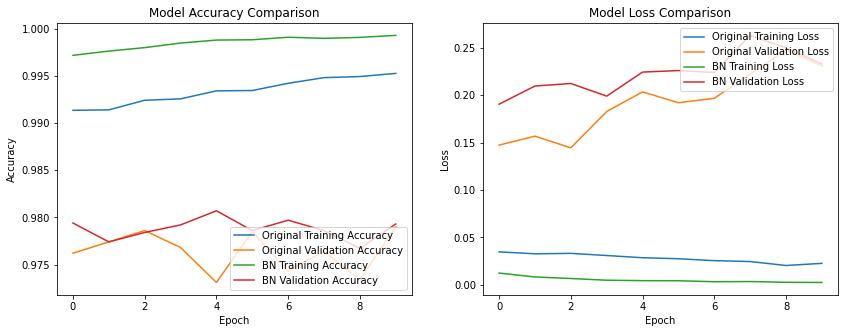

In [18]:
plot_performance(history_bs_16, history_bs_64)

###### So, we can observe that with different batch size(16 and 64), the model accuracy is almost very close to 100% and in both the cases validation accuracy is also very high almost equal to 98%. In case of the model with batch size 64, the model has almost 0% loss which can on the other hand mean to leading to overfitting.

### 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Batch normalization (BN) is a powerful technique in deep learning, offering several advantages that improve the training of neural networks. However, it also has some potential limitations. Here’s a discussion of both aspects:

##### Advantages of Batch Normalization

- Improved Training Stability
- Faster Convergence
- Regularization Effect
- Better Generalization
- Compatibility with Deep Networks


##### Potential Limitations of Batch Normalization

1. **Dependency on Batch Size** - BN relies on batch statistics (mean and variance) for normalization, which can be problematic with small batch sizes. Small batches may not provide reliable statistics, leading to less stable or inconsistent learning. In cases where large batches are not feasible due to memory constraints, the effectiveness of BN may be reduced.

2. **Increased Computational Overhead** -  BN introduces extra computations for calculating the mean and variance during training, as well as the application of these statistics to normalize the data. This can increase the computational overhead and slow down the training process, especially in very large networks or on hardware with limited resources.

3. **Impact on Model Interpretability** - BN makes it harder to interpret the activations of individual neurons since the activations are constantly normalized. This can make it more challenging to diagnose issues or understand the behavior of the network.